In [167]:
import pandas as pd
from pathlib import Path
import numpy as np

In [83]:
pd.set_option('display.max_rows', 20, 'display.max_columns', None)

In [4]:
# movie data from the pudding -- doesn't include actual dialogue
moviepath = Path('../project_data/pudding_movies.csv')
movies = pd.read_csv(moviepath, encoding = 'utf-8')

In [5]:
len(movies)
movies

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774780000000000000000000000000000000...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274530000000000000000000000000000000...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754220000000000000000000000000000000...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777780000000000000000000000000000000...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345766000000000000000
...,...,...,...,...,...,...
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545340000000000000000000000000000000...
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654470000000000000000000000000000000...
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777650000000000000000000000000000000...
1998,3768,tt0421090,Zerophilia,2005,NaN,7647774446763350000000000000000000000000000000...


In [6]:
# dialogue data -- from cornell dialogue data set

In [7]:
dialogpath = Path('../project_data/movie_dialogue.tsv')

dialogue = pd.read_csv(dialogpath, sep = '\t')

dialogue.head()

,mid,cid,cname,mname,gender,wordcount,year,genres,comedy,thriller,drama,romance,lines
0,m0,u0,BIANCA,10 things i hate about you,f,959,1999,"['comedy', 'romance']",True,False,False,True,They do not! / I hope so. / Let's go. / Okay -...
1,m0,u2,CAMERON,10 things i hate about you,m,527,1999,"['comedy', 'romance']",True,False,False,True,"They do to! / She okay? / Wow / No / The ""real..."
2,m0,u4,JOEY,10 things i hate about you,m,278,1999,"['comedy', 'romance']",True,False,False,True,"Listen, I want to talk to you about the prom. ..."
3,m0,u5,KAT,10 things i hate about you,f,1217,1999,"['comedy', 'romance']",True,False,False,True,Perm? / It's just you. / What? To completely d...
4,m0,u6,MANDELLA,10 things i hate about you,f,157,1999,"['comedy', 'romance']",True,False,False,True,William - he asked me to meet him here. / Have...


In [8]:
len(dialogue) #2969

2969

In [9]:
# how many distinct movies in the movie_dialogue dataset -- 600 distinct movies
dialogue.nunique()

mid           600
cid          2969
cname        1925
mname         600
gender          4
wordcount    1428
year           74
genres        283
comedy          2
thriller        2
drama           2
romance         2
lines        2969
dtype: int64

In [10]:
# cornell movie meta data
cmovies = pd.read_csv('../project_data/movie_titles_metadata.tsv', sep='\t', header=None, encoding = 'utf-8')

cmovies.columns = ['movie_id', 'title', 'release_yr', 'rating', 'rating_count','genres']
cmovies.head()
len(cmovies) #617


617

In [11]:
# create imdb_id col in cmovies
cmovies['imdb_id'] = pd.NaT

In [12]:
# movies df from the pudding includes imdb id's, but cmovie df does not

# looks in movies df for exact title match from cmovies -- and grabs the imdb id from movies df
exact_matches = []
no_exact_matches = []

cornell_titles = cmovies['title'].tolist()
for title in cornell_titles:
    # if NaN value -- skip
    if isinstance(title, float):
        continue
    # check for exact match based on title -- in movies df
    exact = movies[movies['title'].str.lower() == title]
    # if num of rows returned is 1 -- aka one movie -- get imdb_id
    if len(exact) == 1:
        id = exact.iat[0,1]
        exact_matches.append(id)
    elif len(exact) == 0: # no exact matches
        no_exact_matches.append(title)


In [13]:
len(exact_matches) # 525

525

In [14]:
# titles ids are all unique
u = set(exact_matches)
len(u)

525

In [15]:
# number of movie titles in cornell data set that don't match to pudding data 
len(no_exact_matches) #88

88

In [16]:
# add imdb id to cmovies titles by looking up title match in pudding movies and grabbing imdb id
for i, row in cmovies.iterrows():
    ctitle = row[1]
    exact_match = movies[movies['title'].str.lower() == ctitle]
    if len(exact_match) == 1:
        id = exact_match.iat[0,1]
        cmovies.at[i,'imdb_id'] = id # grab id from movies df
    

In [17]:
cmovies.count()
# found imdb ids for 525 movies

movie_id        617
title           617
release_yr      617
rating          617
rating_count    617
genres          617
imdb_id         525
dtype: int64

In [18]:
# cmovie rows with missing imdb_id's
cmovies_no_imdb_id = cmovies[cmovies['imdb_id'].isna()]
# cmovies_no_imdb_id
len(cmovies_no_imdb_id) # 92

# will need to manually search the missing imdb ids for these titles

92

In [19]:
# import missing imdb id's data I manually looked up -- 6 are still missing and imdb_id is labelled 'None'
# the 6 missing ones either couldn't be found on imdb or were ambiguous 

idpath = Path('../project_data/missing_title_imdb_ids.csv')
missing_ids = pd.read_csv(idpath, encoding = 'utf-8')
missing_ids
len(missing_ids) # 92

92

In [20]:
# map missing id's to titles in cmovies -- via title col, add missing id to movie row in cmovies
for i, row in missing_ids.iterrows():
    
    mtitle = missing_ids.at[i,'title']
    found_id = missing_ids.at[i, 'imdb_id']
    cmovie_idx = cmovies.index[cmovies['title'] == mtitle].tolist() # returns index
    if len(cmovie_idx) == 1:
        idx = cmovie_idx[0]
        if pd.isnull(cmovies['imdb_id'].iloc[idx]): # make sure nothing is there
            cmovies.at[idx, 'imdb_id'] = found_id


In [21]:
cmovies[cmovies['imdb_id'] == 'None'] # 6

,movie_id,title,release_yr,rating,rating_count,genres,imdb_id
310,m310,crouching tiger hidden dragon,2003,8.0,1091,['action'],None
430,m430,manhunt,2003,8.7,736,['action' 'adventure' 'crime' 'horror' 'thrill...,None
449,m449,murderland,2009,5.8,88,['crime' 'drama' 'mystery'],None
457,m457,neuromancer,1988,9.3,48,['action' 'adventure' 'animation' 'sci-fi'],None
488,m488,red white black & blue,2006,6.3,37,['documentary'],None
605,m605,who's your daddy?,2003/I,4.5,2267,['comedy'],None


In [22]:
# cmovies still missing id -- 1 title (leon) -- bc of accent character
cmovies[cmovies['imdb_id'].isna()]

,movie_id,title,release_yr,rating,rating_count,genres,imdb_id
114,m114,léon,1994,8.6,204901,['crime' 'drama' 'thriller'],NaT


In [23]:
# add leon imdb_id -- problem w/ accent not matching to title in movies
cmovies.loc[cmovies['title'] == 'léon', 'imdb_id'] = 'tt0110413'

In [24]:
# assign all 'None' value imdb_ids to na
cmovies.loc[cmovies['imdb_id'] == 'None', 'imdb_id'] = pd.NA

In [25]:
cmovies.loc[cmovies['imdb_id'].isna()] # should be 6

,movie_id,title,release_yr,rating,rating_count,genres,imdb_id
310,m310,crouching tiger hidden dragon,2003,8.0,1091,['action'],<NA>
430,m430,manhunt,2003,8.7,736,['action' 'adventure' 'crime' 'horror' 'thrill...,<NA>
449,m449,murderland,2009,5.8,88,['crime' 'drama' 'mystery'],<NA>
457,m457,neuromancer,1988,9.3,48,['action' 'adventure' 'animation' 'sci-fi'],<NA>
488,m488,red white black & blue,2006,6.3,37,['documentary'],<NA>
605,m605,who's your daddy?,2003/I,4.5,2267,['comedy'],<NA>


In [26]:
len(cmovies)

617

In [27]:
# drop movie rows from cmovies -- with no imdb_id -- should be 611 rows total 
cmovies_final = cmovies[cmovies['imdb_id'].notna()]
cmovies_final
len(cmovies_final) # should be 611

611

In [28]:
# from here -- i just grab the movie ids from the dialogue df directly and create a new df from that

In [29]:
dialogue_mids_unique = dialogue['mid'].unique()
# print(sorted(dialogue_mids_unique))

In [30]:
len(dialogue_mids_unique) # 600 

600

In [31]:
# create df with dialogue movie ids from dialogue data
dialogue_writers = pd.DataFrame(data=dialogue_mids_unique, index=None, columns=['mid'])
dialogue_writers

,mid
0,m0
1,m1
2,m10
3,m100
4,m101
...,...
595,m95
596,m96
597,m97
598,m98


In [32]:
# add blank col for imdb_id
dialogue_writers['imdb_id'] = ''

In [33]:
# map each mid from dialogues to the proper imdb_id from cmovies
for i, row in dialogue_writers.iterrows():
    mid = dialogue_writers.at[i,'mid']
    cmovie_idx = cmovies_final.index[cmovies_final['movie_id'] == mid].tolist() # returns index
    if len(cmovie_idx) == 1:
        idx = cmovie_idx[0]
        imdb_id = cmovies_final.at[idx, 'imdb_id']
        dialogue_writers.at[i,'imdb_id'] = imdb_id
        
    

In [34]:
dialogue_writers

,mid,imdb_id
0,m0,tt0147800
1,m1,tt0103594
2,m10,tt0118564
3,m100,tt0093260
4,m101,tt0140352
...,...,...
595,m95,tt0480249
596,m96,tt0045917
597,m97,tt0116629
598,m98,tt0097576


In [35]:
# imdb id -- none, ambiguous, or no writers info
dialogue_writers[dialogue_writers['imdb_id'] == ''] # 6

,mid,imdb_id
233,m310,
361,m430,
381,m449,
389,m457,
421,m488,
548,m605,


In [36]:
len(dialogue_writers) # 600

600

In [37]:
# drop empty imdb_id rows -- length should be 594
dialogue_writers = dialogue_writers[dialogue_writers['imdb_id'] != '']
len(dialogue_writers)

594

In [38]:
# import imdb crew data -- shows name ids for directors / writers
crewpath = Path('../project_data/title.crew.tsv')

imdb_crew = pd.read_csv(crewpath, sep = '\t')
imdb_crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
8331065,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
8331066,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
8331067,tt9916852,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
8331068,tt9916856,nm10538645,nm6951431


In [39]:
# create writers col in dialogue_writers df
dialogue_writers['writer_ids'] = ''
dialogue_writers

<ipython-input-39-162b85de2af5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dialogue_writers['writer_ids'] = ''


,mid,imdb_id,writer_ids
0,m0,tt0147800,
1,m1,tt0103594,
2,m10,tt0118564,
3,m100,tt0093260,
4,m101,tt0140352,
...,...,...,...
595,m95,tt0480249,
596,m96,tt0045917,
597,m97,tt0116629,
598,m98,tt0097576,


In [40]:
# check that imdb_id's are all unique
s = set(dialogue_writers.imdb_id)
len(s) # 594

594

In [41]:
# for each imdb_id -- map to id in imdb_crew data and get writer_id
for i, row in dialogue_writers.iterrows():
    imdb_id = dialogue_writers.at[i,'imdb_id']
    #print(imdb_id)
    match = imdb_crew[imdb_crew['tconst'] == imdb_id]
    writer_ids = match.iloc[0,2] # get writers col value
    writer_ids_list = writer_ids.split(',') # convert string of ids to list
    dialogue_writers.at[i,'writer_ids'] = writer_ids_list

In [42]:
# dialogue_writers with writer ids -- 594
dialogue_writers

,mid,imdb_id,writer_ids
0,m0,tt0147800,"[nm0527581, nm0809006, nm0000636]"
1,m1,tt0103594,[nm0097785]
2,m10,tt0118564,"[nm0001930, nm0001707]"
3,m100,tt0093260,"[nm0698734, nm0090151]"
4,m101,tt0140352,"[nm0107493, nm0744839, nm0000520]"
...,...,...,...
595,m95,tt0480249,"[nm0698873, nm0326040, nm0558577, nm0181019, n..."
596,m96,tt0045917,"[nm0086701, nm0061510]"
597,m97,tt0116629,"[nm0002041, nm0000386]"
598,m98,tt0097576,"[nm0090151, nm0000184, nm0583675, nm0442241]"


In [43]:
# import imdb name data
namepath = Path('../project_data/name.basics.tsv')

imdb_names = pd.read_csv(namepath, sep = '\t')

In [44]:
# drop un-needed cols from imdb_names
imdb_names.drop('knownForTitles', axis=1, inplace=True)
imdb_names.drop('birthYear', axis=1, inplace=True)
imdb_names.drop('deathYear', axis=1, inplace=True)

In [45]:
imdb_names 

,nconst,primaryName,primaryProfession
0,nm0000001,Fred Astaire,"soundtrack,actor,miscellaneous"
1,nm0000002,Lauren Bacall,"actress,soundtrack"
2,nm0000003,Brigitte Bardot,"actress,soundtrack,music_department"
3,nm0000004,John Belushi,"actor,soundtrack,writer"
4,nm0000005,Ingmar Bergman,"writer,director,actor"
...,...,...,...
11323479,nm9993714,Romeo del Rosario,"animation_department,art_department"
11323480,nm9993716,Essias Loberg,NaN
11323481,nm9993717,Harikrishnan Rajan,cinematographer
11323482,nm9993718,Aayush Nair,cinematographer


In [46]:
# add name col in dialogue_writers
dialogue_writers['writer_names'] = ''

<ipython-input-46-73be9459c6f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dialogue_writers['writer_names'] = ''


In [47]:
dialogue_writers

,mid,imdb_id,writer_ids,writer_names
0,m0,tt0147800,"[nm0527581, nm0809006, nm0000636]",
1,m1,tt0103594,[nm0097785],
2,m10,tt0118564,"[nm0001930, nm0001707]",
3,m100,tt0093260,"[nm0698734, nm0090151]",
4,m101,tt0140352,"[nm0107493, nm0744839, nm0000520]",
...,...,...,...,...
595,m95,tt0480249,"[nm0698873, nm0326040, nm0558577, nm0181019, n...",
596,m96,tt0045917,"[nm0086701, nm0061510]",
597,m97,tt0116629,"[nm0002041, nm0000386]",
598,m98,tt0097576,"[nm0090151, nm0000184, nm0583675, nm0442241]",


In [48]:
# map writer_ids for each movie to writer_names from imdb_names df
# for each movie -- get writers list
for i, row in dialogue_writers.iterrows():
    writers_list = dialogue_writers.at[i,'writer_ids']
    #print(writers_list)
    names_list = []
    # for each writer of the movie -- look up name from imdb_names
    for writer_id in writers_list:
        match = imdb_names[imdb_names['nconst'] == writer_id]
        name = match.iloc[0,1] # get name
        names_list.append(name) # add name to list
    
    dialogue_writers.at[i,'writer_names'] = names_list # update writer_names col w/ writers name list
    

In [49]:
dialogue_writers

,mid,imdb_id,writer_ids,writer_names
0,m0,tt0147800,"[nm0527581, nm0809006, nm0000636]","[Karen McCullah, Kirsten Smith, William Shakes..."
1,m1,tt0103594,[nm0097785],[Rose Bosch]
2,m10,tt0118564,"[nm0001930, nm0001707]","[Russell Banks, Paul Schrader]"
3,m100,tt0093260,"[nm0698734, nm0090151]","[Chip Proser, Jeffrey Boam]"
4,m101,tt0140352,"[nm0107493, nm0744839, nm0000520]","[Marie Brenner, Eric Roth, Michael Mann]"
...,...,...,...,...
595,m95,tt0480249,"[nm0698873, nm0326040, nm0558577, nm0181019, n...","[Mark Protosevich, Akiva Goldsman, Richard Mat..."
596,m96,tt0045917,"[nm0086701, nm0061510]","[Richard Blake, John Tucker Battle]"
597,m97,tt0116629,"[nm0002041, nm0000386]","[Dean Devlin, Roland Emmerich]"
598,m98,tt0097576,"[nm0090151, nm0000184, nm0583675, nm0442241]","[Jeffrey Boam, George Lucas, Menno Meyjes, Phi..."


In [50]:
# sort rows by mid
dialogue_writers['sort_temp'] = dialogue_writers['mid'].str.extract('(\d+)', expand=False).astype(int)

<ipython-input-50-b61f4bfb50f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dialogue_writers['sort_temp'] = dialogue_writers['mid'].str.extract('(\d+)', expand=False).astype(int)


In [51]:
dialogue_writers_sorted = dialogue_writers.sort_values('sort_temp',inplace=False)

In [52]:
dialogue_writers_sorted

,mid,imdb_id,writer_ids,writer_names,sort_temp
0,m0,tt0147800,"[nm0527581, nm0809006, nm0000636]","[Karen McCullah, Kirsten Smith, William Shakes...",0
1,m1,tt0103594,[nm0097785],[Rose Bosch],1
111,m2,tt0179626,[nm0381273],[John Herzfeld],2
220,m3,tt0062622,"[nm0000040, nm0002009]","[Stanley Kubrick, Arthur C. Clarke]",3
328,m4,tt0083511,"[nm0006854, nm0001353, nm0343419, nm0211823]","[Roger Spottiswoode, Walter Hill, Larry Gross,...",4
...,...,...,...,...,...
554,m610,tt0032138,"[nm0486538, nm0753249, nm0941138, nm0000875, n...","[Noel Langley, Florence Ryerson, Edgar Allan W...",610
555,m611,tt0143145,"[nm0701031, nm0905498, nm0270761, nm0001220]","[Neal Purvis, Robert Wade, Bruce Feirstein, Ia...",611
556,m612,tt0409459,"[nm1733301, nm0371684, nm0874844]","[Dave Gibbons, David Hayter, Alex Tse]",612
557,m613,tt0295701,[nm0929186],[Rich Wilkes],613


In [53]:
dialogue_writers_sorted = dialogue_writers_sorted.drop('sort_temp', axis=1)

In [54]:
dialogue_writers_sorted

,mid,imdb_id,writer_ids,writer_names
0,m0,tt0147800,"[nm0527581, nm0809006, nm0000636]","[Karen McCullah, Kirsten Smith, William Shakes..."
1,m1,tt0103594,[nm0097785],[Rose Bosch]
111,m2,tt0179626,[nm0381273],[John Herzfeld]
220,m3,tt0062622,"[nm0000040, nm0002009]","[Stanley Kubrick, Arthur C. Clarke]"
328,m4,tt0083511,"[nm0006854, nm0001353, nm0343419, nm0211823]","[Roger Spottiswoode, Walter Hill, Larry Gross,..."
...,...,...,...,...
554,m610,tt0032138,"[nm0486538, nm0753249, nm0941138, nm0000875, n...","[Noel Langley, Florence Ryerson, Edgar Allan W..."
555,m611,tt0143145,"[nm0701031, nm0905498, nm0270761, nm0001220]","[Neal Purvis, Robert Wade, Bruce Feirstein, Ia..."
556,m612,tt0409459,"[nm1733301, nm0371684, nm0874844]","[Dave Gibbons, David Hayter, Alex Tse]"
557,m613,tt0295701,[nm0929186],[Rich Wilkes]


In [55]:
# export dialogue_writers data to csv 
dialogue_writers_sorted.to_csv('dialogue_writers.csv', encoding='utf-8')

# Visualizations

In [70]:
mids = list(dialogue_writers_sorted['mid'])
len(mids)

594

In [114]:
titles = cmovies.loc[cmovies['movie_id'].isin(mids), :]

In [115]:
titles

,movie_id,title,release_yr,rating,rating_count,genres,imdb_id
0,m0,10 things i hate about you,1999,6.9,62847,['comedy' 'romance'],tt0147800
1,m1,1492: conquest of paradise,1992,6.2,10421,['adventure' 'biography' 'drama' 'history'],tt0103594
2,m2,15 minutes,2001,6.1,25854,['action' 'crime' 'drama' 'thriller'],tt0179626
3,m3,2001: a space odyssey,1968,8.4,163227,['adventure' 'mystery' 'sci-fi'],tt0062622
4,m4,48 hrs.,1982,6.9,22289,['action' 'comedy' 'crime' 'drama' 'thriller'],tt0083511
...,...,...,...,...,...,...,...
610,m610,the wizard of oz,1939,8.3,104873,['adventure' 'family' 'fantasy' 'musical'],tt0032138
611,m611,the world is not enough,1999,6.3,60047,['action' 'adventure' 'thriller'],tt0143145
612,m612,watchmen,2009,7.8,135229,['action' 'crime' 'fantasy' 'mystery' 'sci-fi'...,tt0409459
613,m613,xxx,2002,5.6,53505,['action' 'adventure' 'crime'],tt0295701


In [119]:
# strip all release dates of any non-numerical pre or post fixes
for i, row in titles.iterrows():
    release_yr = titles.at[i, 'release_yr']
    titles.at[i, 'release_yr'] = titles.at[i,'release_yr'].strip('/I')
    

In [120]:
# convert release dates to int type
titles = titles.astype({'release_yr': 'int'})

In [128]:
titles['release_yr'].describe()

count     594.000000
mean     1988.531987
std        16.390569
min      1927.000000
25%      1984.000000
50%      1994.000000
75%      1999.000000
max      2010.000000
Name: release_yr, dtype: float64

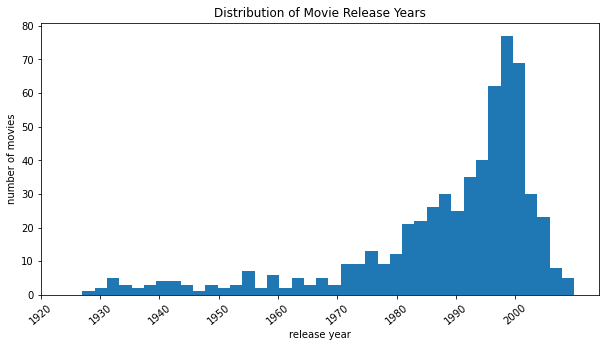

In [177]:
titles_hist = titles['release_yr'].plot(kind = 'hist', bins = 40,figsize = (10,5), 
                                        title = 'Distribution of Movie Release Years', 
                                        rot = 40)
                                        
titles_hist.set_ylabel('number of movies')
titles_hist.set_xlabel('release year')
titles_hist.set_xticks(np.arange(1920, 2010, step=10))